# Luces de semáforos

El objetivo de este notebook es encontrar la luz verde, amarilla y roja de semáforos en videos

## Cargando librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import time

## Definiendo las funciones

Conviertiendo la imagen de BGR a HSV

In [2]:
def convert_hsv(image):
    return cv.cvtColor(image, cv.COLOR_BGR2HSV)

Definiendo la máscara roja de la imagen

In [3]:
def f_mask_red(image):
    lower_red1 = np.array([0, 0, 185])
    upper_red1 = np.array([10, 255, 255])
    #lower_red2 = np.array([170, 100, 100])
    #upper_red2 = np.array([180, 255, 255])
    
    img_hsv = convert_hsv(image)
    #mask1 = cv.inRange(img_hsv, lower_red1, upper_red1)
    #mask2 = cv.inRange(img_hsv, lower_red2, upper_red2)
    #mask_red = cv.add(mask1, mask2)
    mask_red = cv.inRange(img_hsv, lower_red1, upper_red1)
    
    return mask_red

Definiendo la máscara amarilla de la imagen

In [4]:
def f_mask_yellow(image):
    img_hsv = convert_hsv(image)
    lower_yellow = np.array([15, 24, 205])
    upper_yellow = np.array([35, 255, 255])
    mask_yellow = cv.inRange(img_hsv, lower_yellow, upper_yellow)
    return mask_yellow

Definiendo la máscara verde de la imagen

In [5]:
def f_mask_green(image):
    img_hsv = convert_hsv(image)
    lower_green = np.array([55, 130, 100])
    upper_green = np.array([75, 205, 255])
    mask_green = cv.inRange(img_hsv, lower_green, upper_green)
    return mask_green

In [6]:
def print_circles(image, mask, circles, color, thresh):
    font = cv.FONT_HERSHEY_SIMPLEX
    region = 5
    
    if color is "r":
        colorText = "Rojo"
        colorRGB = (0,0,255)
    if color is "y":
        colorText = "Amarillo"
        colorRGB = (0,255,255)
    if color is "g":
        colorText = "Verde"
        colorRGB = (0,255,0)
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            pixel_value = 0.0
            n = 0.0
            for j in range(-region, region):
                for k in range(-region, region):
                    if (i[1]+j < image.shape[1]) and (i[0]+k < image.shape[0]):
                        pixel_value += mask[i[1]+j, i[0]+k]
                        n += 1
            if n != 0:
                if pixel_value/n > thresh:
                    cv.circle(image, (i[0], i[1]), i[2]+5, colorRGB, 1)
                    cv.putText(image, colorText, (i[0]-i[2], i[1]-i[2]-10), font, 0.3, colorRGB, 1, cv.LINE_AA)
                
    return image

Función para mostrar los círculos según el color de la máscara

In [7]:
def get_circles(image ,thresh):
    r = 0.5
    width = int(r*image.shape[1])
    height = int(r*image.shape[0])
    image = cv.resize(image, (width, height), interpolation = cv.INTER_NEAREST)
    
    mask_red = f_mask_red(image)
    mask_yellow = f_mask_yellow(image)
    mask_green = f_mask_green(image)
    
    
    circles_red = cv.HoughCircles(mask_red, cv.HOUGH_GRADIENT, 1, 30, param1=50, param2=5, minRadius=0, maxRadius=30)
    circles_yellow = cv.HoughCircles(mask_yellow, cv.HOUGH_GRADIENT, 1, 30, param1=50, param2=5, minRadius=0, maxRadius=30)
    circles_green = cv.HoughCircles(mask_green, cv.HOUGH_GRADIENT, 1, 30, param1=50, param2=5, minRadius=0, maxRadius=30)
    
    image = print_circles(image, mask_red, circles_red, "r", thresh)
    image = print_circles(image, mask_yellow, circles_yellow, "y", thresh)
    image = print_circles(image, mask_green, circles_green, "g", thresh)
    
    return image

## Probando el algoritmo en imagenes

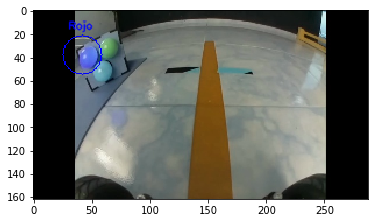

In [8]:
img1 = cv.imread("figuras/imagen_428.jpg")

img1 = get_circles(img1, 50)

plt.imshow(img1)
plt.show()

## Probando el algoritmo en un video de prueba

In [9]:
video = cv.VideoCapture("videos/Semaforo_10fp.mp4")
while(video.isOpened()):
    ret, frame = video.read()
    #time.sleep(0.03)
    if ret:
        frame = get_circles(frame, 200)
        cv.imshow("Deteccion de semáforos", frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
video.release()
cv.destroyAllWindows()

## Implementando el algoritmo en un video con multiples objetos

In [10]:
video = cv.VideoCapture("./videos/Vuelta_objetos_10fp.mp4")
while(video.isOpened()):
    ret, frame = video.read()
    #time.sleep(0.03)
    if ret:
        frame = get_circles(frame, 200)
        cv.imshow("Deteccion de semáforos", frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
video.release()
cv.destroyAllWindows()